In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [4]:
# Load MNIST CSV datasets

train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

# Separate features and labels
x_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values

x_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (60000, 784), y_train shape: (60000,)
x_test shape: (10000, 784), y_test shape: (10000,)


In [5]:

# Preprocess the data

# Normalize pixel values to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Optional: StandardScaler for some classifiers
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Preprocessing complete!")


Preprocessing complete!


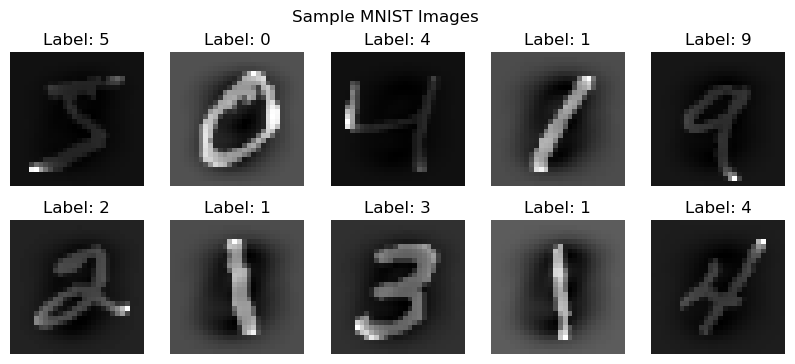

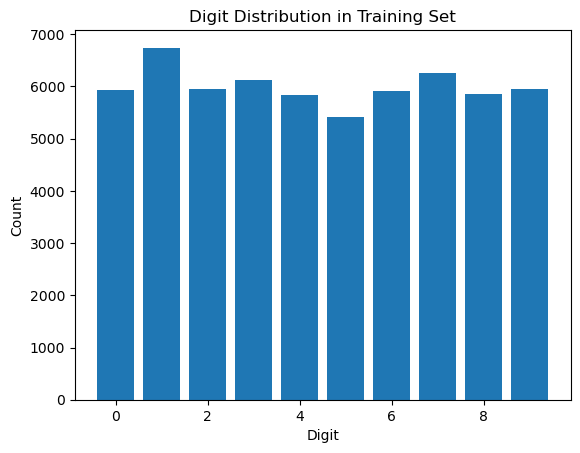

In [6]:

# Visualize sample images

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images")
plt.show()

# Digit distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Digit Distribution in Training Set')
plt.show()


In [7]:

# Train a Random Forest classifier 
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

# Predict on test set
y_pred = clf.predict(x_test)


Test Accuracy: 97.04%


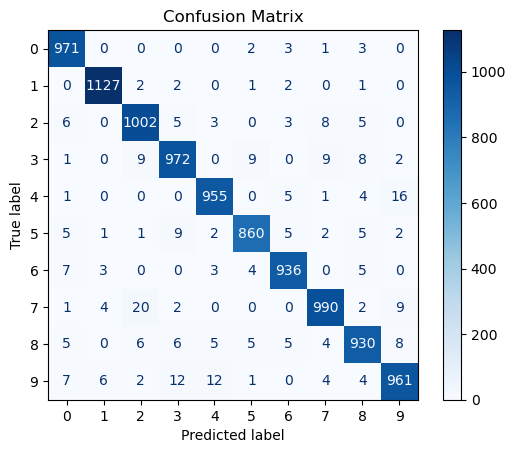

In [8]:

# Evaluate test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


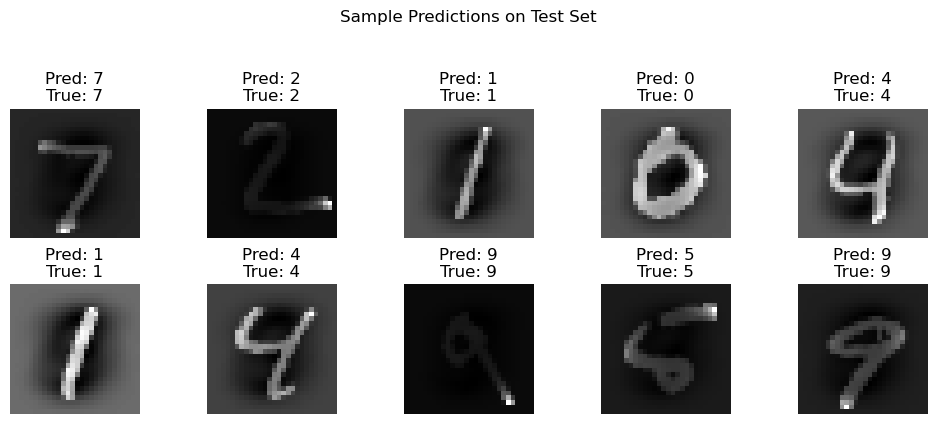

In [10]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.suptitle("Sample Predictions on Test Set", y=1.05)  # move main title up
plt.tight_layout()
plt.show()
